In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6954 - val_loss: 0.6952
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6952 - val_loss: 0.6950
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.6945 - val_loss: 0.6944


In [8]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
hidden_dim = 128  # Size of additional hidden layer

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
hidden = Dense(hidden_dim, activation='relu')(input_img)  # First hidden layer
encoded = Dense(encoding_dim, activation='relu')(hidden)  # Encoded layer
# "decoded" is the lossy reconstruction of the input
decoded_hidden = Dense(hidden_dim, activation='relu')(encoded)  # Additional hidden layer in decoder
decoded = Dense(784, activation='sigmoid')(decoded_hidden)  # Output layer
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import fashion_mnist
import numpy as np

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.6936 - val_loss: 0.6934
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.6929 - val_loss: 0.6928


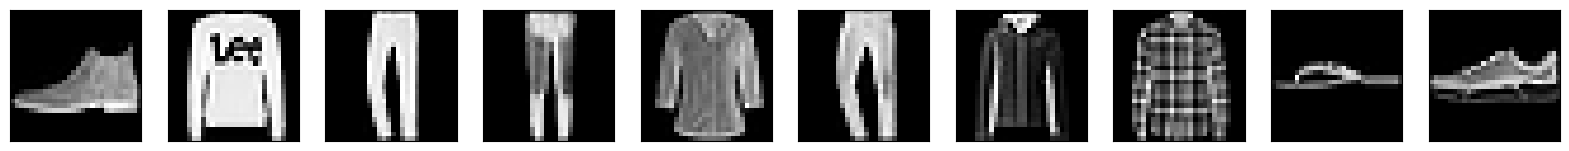

In [12]:
import matplotlib.pyplot as plt

# Visualize the original test data before reconstruction
def visualize_original_data(x_test, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display original images
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize the first 10 test images
visualize_original_data(x_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


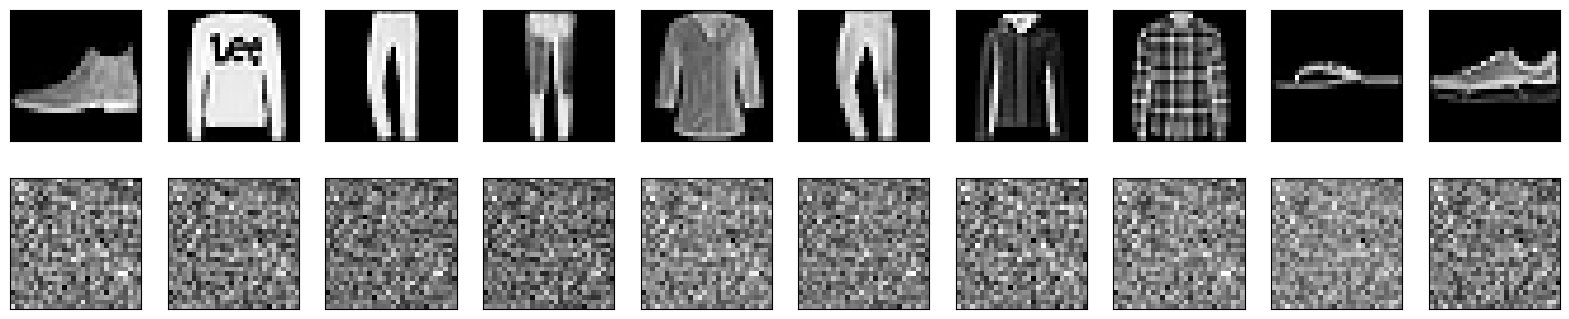

In [13]:
# Predict the reconstructed test data
reconstructed_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed images side by side
def visualize_reconstructed_data(x_test, reconstructed_imgs, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display original images
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstructed images
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize the first 10 original and reconstructed test images
visualize_reconstructed_data(x_test, reconstructed_imgs)



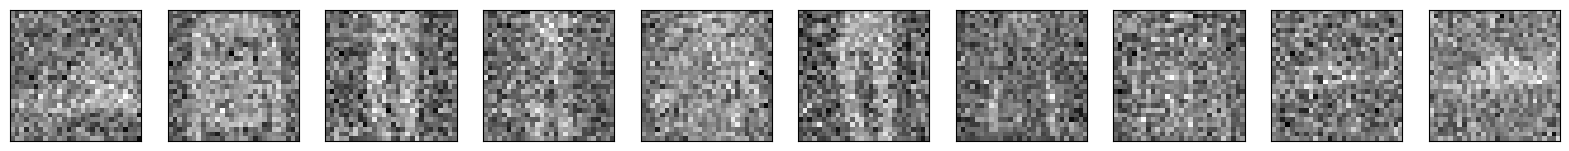

In [14]:
import matplotlib.pyplot as plt

# Visualize the noisy test data before reconstruction
def visualize_noisy_data(x_test_noisy, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display noisy images
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Visualize the first 10 noisy test images
visualize_noisy_data(x_test_noisy)





313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


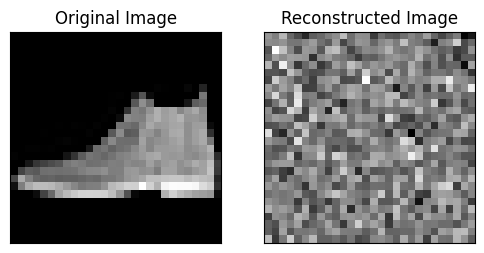

In [16]:
# Predict the reconstructed test data using the original test images
reconstructed_imgs = autoencoder.predict(x_test_noisy)

# Visualize the original test images and one of the reconstructed images
def visualize_original_and_reconstructed(x_test, reconstructed_imgs, index):
    plt.figure(figsize=(6, 6))

    # Display original image
    ax = plt.subplot(1, 2, 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.title('Original Image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image
    ax = plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_imgs[index].reshape(28, 28))
    plt.title('Reconstructed Image')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.show()

# Visualize the original and one of the reconstructed images (change the index to see different images)
visualize_original_and_reconstructed(x_test, reconstructed_imgs, index=0)  # Change index as needed



Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7137 - loss: 0.8365 - val_accuracy: 0.8324 - val_loss: 0.4765
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8491 - loss: 0.4347 - val_accuracy: 0.8501 - val_loss: 0.4251
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8623 - loss: 0.3932 - val_accuracy: 0.8514 - val_loss: 0.4165
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8729 - loss: 0.3602 - val_accuracy: 0.8630 - val_loss: 0.3882
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8792 - loss: 0.3419 - val_accuracy: 0.8635 - val_loss: 0.3819
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8830 - loss: 0.3263 - val_accuracy: 0.8689 - val_loss: 0.3622
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8861 - loss: 0.3211 - val_accuracy: 0.8702 - val_loss: 0.3684
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8917 - loss: 0.3018 - val_accuracy: 0

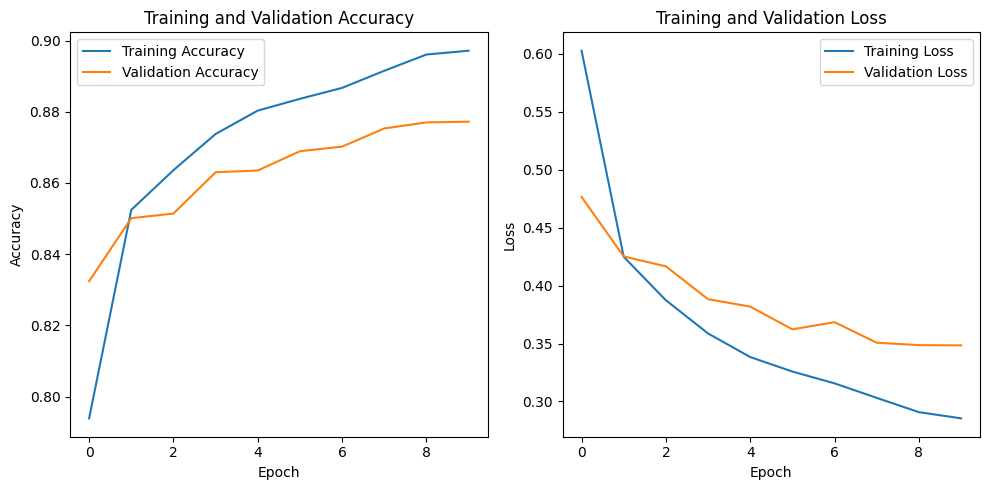

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Load and prepare the Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Model architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(10, activation='softmax')(encoded)  # Classification layer

model = Model(input_img, decoded)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, y_test))

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

